-> Olfacto loaded
Ins
             Source      SS     DF     MS       F   p-unc    np2
0          rdm_time   0.415    1.0  0.415   3.194  0.0753  0.015
1             conds   3.988    1.0  3.988  30.698  0.0000  0.125
2  rdm_time * conds   4.119    1.0  4.119  31.713  0.0000  0.129
3          Residual  27.798  214.0  0.130     NaN     NaN    NaN 

            A          B  mean(A)  mean(B)   diff     se       tail      T  \
0  early high  early low    0.423    0.969 -0.545  0.069  one-sided -7.897   
1  early high  late high    0.423    0.783 -0.360  0.069  one-sided -5.231   
2  early high   late low    0.423    0.779 -0.355  0.069  one-sided -5.143   
3   early low  late high    0.969    0.783  0.186  0.069  one-sided  2.689   
4   early low   late low    0.969    0.779  0.190  0.069  one-sided  2.741   
5   late high   late low    0.783    0.779  0.004  0.069  one-sided  0.064   

    p-tukey  hedges  
0  0.000500  -1.502  
1  0.000500  -0.991  
2  0.000500  -0.978  
3  0.018343   0.

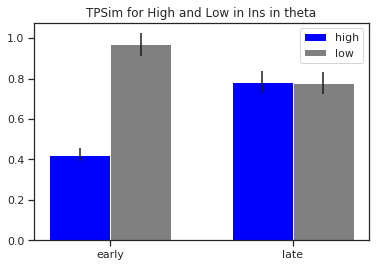

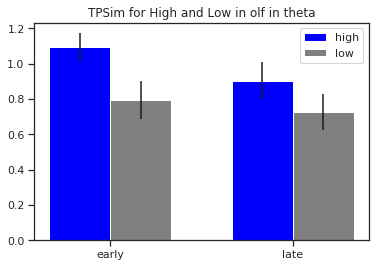

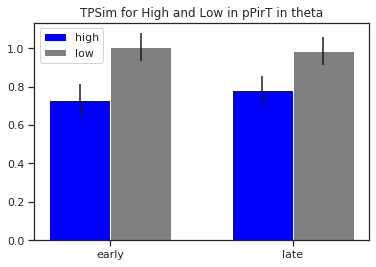

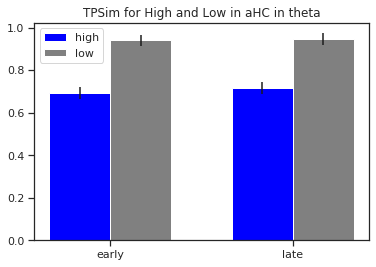

In [78]:
import numpy as np
from itertools import product
from brainpipe.system import study
from os.path import join, exists
from os import makedirs
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import pandas as pd
import researchpy as rp
import pingouin as pg
import glob

feat, exp, th = 'tps','Enc','0.01'
freqs = ['theta'] #'1_alpha', '2_beta','3_gamma', high_gamma
conds = ['low','high']
types = ['early','late']
###############################################################################
st = study('Olfacto')
path_wth = join(st.path, 'feature/TPSim_'+exp+'_By_Odor_By_Cond/rdm_thgh_time/')
tps_form = join(path_wth, 'TPS_spear_{}_{}_{}_{}_2_extr_gob.npz') #su condfreq, phase
path_fig = join(st.path, 'figure/TPSim_LDA_'+exp[0]+'_by_cond_6freqs_3s_dissim/')
path_df = join(path_fig, 'npy_figs/')
path2save = join(path_fig, 'ANOVA_early_late/')
fig_save = join(path2save, 'Bar_plots_{}_{}_{}_{}_{}_2_extr_gob.png')
stats_save = join(path2save, '{}_{}_{}_{}_{}_{}_2_extr_gob.csv')
###############################################################################
if not exists(path2save):
    makedirs(path2save)
###############################################################################
files = glob.glob(path_df.format(exp[0])+freqs[0]+'*'+th+'_tps.csv')
###############################################################################

for fi in files:
    freq, roi = freqs[0],fi.split('_')[-4]
    df = pd.read_csv(fi)
    subjects, channels = df['subjects'], df['channels']
    su_list, elec_list, tps_types_list = [],[],[]
    conds_list, tps = [], []
    for su, chan in zip(subjects, channels):
        for cond,type_ in product(conds,types):
            #mat = np.load(tps_form.format(su,freq,type_,'Low_High'),allow_pickle=True)
            mat = np.load(tps_form.format(su,cond,freq,type_),allow_pickle=True)
            idx_chan = [i for i,c in enumerate(mat['channels']) if c == chan][0]
            lab = roi
            n_trials = len(mat['rdm'][idx_chan])

            tps.extend(mat['rdm'][idx_chan])
            su_list.extend([su]*n_trials)
            elec_list.extend([chan]*n_trials)
            tps_types_list.extend([type_]*n_trials)
            conds_list.extend([cond]*n_trials)

    df = pd.DataFrame({'subjects':su_list, 'elecs':elec_list, 'rdm_time':tps_types_list,
                       'conds':conds_list, 'tps':tps})
    df_anova = df.anova(dv="tps", between=["rdm_time", "conds"]).round(5)
    df['type_cond'] = df['rdm_time']+' '+df['conds']
    post_hoc = pg.pairwise_tukey(data=df,dv='tps', between=['type_cond'],
                                tail='one-sided')
    df_anova.to_csv(stats_save.format('ANOVA',lab,freq,exp,th,'all_elecs'))
    post_hoc.to_csv(stats_save.format('Posthocs',lab,freq,exp,th,'all_elecs'))
    print(lab)
    print(df_anova ,'\n')
    print(post_hoc)
    
    plt.figure()
    df_plot = df.groupby(by="type_cond")
    means = df_plot['tps'].mean()
    sd = df_plot['tps'].sem()
    cond_name = ['high', 'low']
    plt.bar([0,1.5], [means[0],means[2]], width=0.5, yerr=[sd[0],sd[1]], color='blue')
    plt.bar([0.5,2], [means[1],means[3]], width=0.5, yerr=[sd[1],sd[3]], color='grey')
    plt.xticks([0.25,1.75],labels=['early','late'])
    plt.legend(cond_name)
    
    plt.title('TPSim for High and Low in {} in {}'.format(lab,freq))
    plt.savefig(fig_save.format(lab,freq,exp,th,'all_elecs'))


In [79]:
"""
ANOVA for TPSim Early/Late BY electrode
"""
import numpy as np
from itertools import product
from brainpipe.system import study
from os.path import join, exists
from os import makedirs
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import pandas as pd
import researchpy as rp
import pingouin as pg
import glob

feat, exp, th = 'tps','Enc','0.01'
freqs = ['theta'] #'1_alpha', '2_beta','3_gamma', high_gamma
conds = ['low','high']
types = ['early','late']
###############################################################################
st = study('Olfacto')
path_wth = join(st.path, 'feature/TPSim_'+exp+'_By_Odor_By_Cond/rdm_thgh_time/')
tps_form = join(path_wth, 'TPS_spear_{}_{}_{}_{}_2_extr_gob.npz') #su condfreq, phase
path_fig = join(st.path, 'figure/TPSim_LDA_'+exp[0]+'_by_cond_6freqs_3s_dissim/')
path_df = join(path_fig, 'npy_figs/')
path2save = join(path_fig, 'ANOVA_early_late/')
fig_save = join(path2save, 'Bar_plots_{}_{}_{}_{}_{}_med_split.png')
stats_save = join(path2save, '{}_{}_{}_{}_{}_{}_med_split.csv')
###############################################################################
if not exists(path2save):
    makedirs(path2save)
###############################################################################
files = glob.glob(path_df.format(exp[0])+freqs[0]+'*'+th+'_tps.csv')
###############################################################################

for fi in files:
    freq, roi = freqs[0],fi.split('_')[-4]
    if roi != 'Ins':
        df = pd.read_csv(fi)
        subjects, channels = df['subjects'], df['channels']
        for su, chan in zip(subjects, channels):
            tps, su_list, elec_list = [], [], []
            tps_types_list, conds_list = [], []
            for cond,type_ in product(conds,types):
                mat = np.load(tps_form.format(su,cond,freq,type_),allow_pickle=True)
                idx_chan = [i for i,c in enumerate(mat['channels']) if c == chan][0]
                lab = roi
                n_trials = len(mat['rdm'][idx_chan])

                tps.extend(mat['rdm'][idx_chan])
                su_list.extend([su]*n_trials)
                elec_list.extend([chan]*n_trials)
                tps_types_list.extend([type_]*n_trials)
                conds_list.extend([cond]*n_trials)

            df = pd.DataFrame({'subjects':su_list, 'elecs':elec_list, 'rdm_time':tps_types_list,
                               'conds':conds_list, 'tps':tps})
            df_anova = df.anova(dv="tps", between=["rdm_time", "conds"]).round(5)
            df['type_cond'] = df['rdm_time']+' '+df['conds']
            post_hoc_0 = pg.pairwise_tukey(data=df,dv='tps', between=['rdm_time'],
                                        tail='one-sided')
            post_hoc = pg.pairwise_tukey(data=df,dv='tps', between=['type_cond'],
                                        tail='one-sided')
            df_anova.to_csv(stats_save.format('ANOVA',lab,freq,exp,th,'all_elecs'))
            post_hoc.to_csv(stats_save.format('Posthocs',lab,freq,exp,th,'all_elecs'))
            print(su,chan,roi)
            print(df_anova ,'\n')
            print(post_hoc_0)
            print(post_hoc)


-> Olfacto loaded
LEFC o4-o3 olf
             Source      SS    DF     MS      F    p-unc    np2
0          rdm_time   0.119   1.0  0.119  0.452  0.50309  0.005
1             conds   0.615   1.0  0.615  2.340  0.12944  0.024
2  rdm_time * conds   0.158   1.0  0.158  0.602  0.43984  0.006
3          Residual  24.701  94.0  0.263    NaN      NaN    NaN 

       A     B  mean(A)  mean(B)  diff     se       tail      T   p-tukey  \
0  early  late    0.966    0.897  0.07  0.104  one-sided  0.669  0.251857   

   hedges  
0   0.134  
            A          B  mean(A)  mean(B)   diff     se       tail      T  \
0  early high  early low    1.070    0.829  0.241  0.148  one-sided  1.630   
1  early high  late high    1.070    0.931  0.139  0.137  one-sided  1.016   
2  early high   late low    1.070    0.852  0.218  0.148  one-sided  1.473   
3   early low  late high    0.829    0.931 -0.102  0.148  one-sided -0.689   
4   early low   late low    0.829    0.852 -0.023  0.158  one-sided -0.146  

LEFC b3-b2 aHC
             Source      SS    DF     MS      F    p-unc    np2
0          rdm_time   0.123   1.0  0.123  0.516  0.47422  0.005
1             conds   1.258   1.0  1.258  5.271  0.02390  0.053
2  rdm_time * conds   0.286   1.0  0.286  1.199  0.27641  0.013
3          Residual  22.425  94.0  0.239    NaN      NaN    NaN 

       A     B  mean(A)  mean(B)   diff     se       tail      T   p-tukey  \
0  early  late    0.911     0.84  0.071  0.101  one-sided  0.702  0.241374   

   hedges  
0   0.141  
            A          B  mean(A)  mean(B)   diff     se       tail      T  \
0  early high  early low    0.860    0.979 -0.120  0.141  one-sided -0.849   
1  early high  late high    0.860    0.695  0.164  0.131  one-sided  1.259   
2  early high   late low    0.860    1.033 -0.174  0.141  one-sided -1.230   
3   early low  late high    0.979    0.695  0.284  0.141  one-sided  2.014   
4   early low   late low    0.979    1.033 -0.054  0.151  one-sided -0.357   
5   late high 

-> Olfacto loaded
IFG
              Source       SS      DF      MS        F    p-unc    np2
0          tps_types   71.826     1.0  71.826  339.258  0.00000  0.103
1              conds   20.222     1.0  20.222   95.515  0.00000  0.031
2  tps_types * conds    0.020     1.0   0.020    0.093  0.76016  0.000
3           Residual  626.679  2960.0   0.212      NaN      NaN    NaN 

              A            B  mean(A)  mean(B)   diff     se       tail  \
0  between high  between low   -0.019    0.145 -0.164  0.017  one-sided   
1  between high  within high   -0.019    0.622 -0.641  0.049  one-sided   
2  between high   within low   -0.019    0.808 -0.827  0.051  one-sided   
3   between low  within high    0.145    0.622 -0.477  0.049  one-sided   
4   between low   within low    0.145    0.808 -0.663  0.051  one-sided   
5   within high   within low    0.622    0.808 -0.186  0.069  one-sided   

        T   p-tukey  hedges  
0  -9.390  0.000500  -0.356  
1 -12.987  0.000500  -1.392  
2 -16

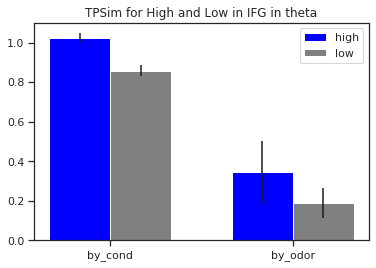

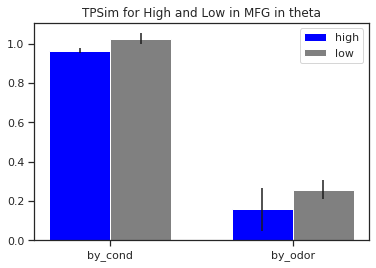

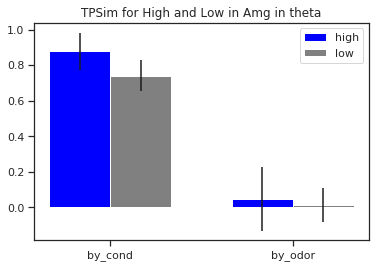

In [70]:
import numpy as np
from itertools import product
from brainpipe.system import study
from os.path import join, exists
from os import makedirs
from scipy import stats
from scipy.stats import sem
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import pandas as pd
import researchpy as rp
import pingouin as pg
import glob

feat, exp, th = 'tps','Ret','0.01'
freqs = ['theta'] #'1_alpha', '2_beta','3_gamma', high_gamma
conds = ['low','high']
types = ['within','between']
###############################################################################
st = study('Olfacto')
path_wth = join(st.path, 'feature/TPSim_'+exp+'_By_Odor_By_Cond/TPS_by_odor/')
wth_form = join(path_wth, 'TPS_pears_{}_{}_wth_{}.npz')
btw_form = join(path_wth, 'TPS_pears_{}_{}_btw_{}.npz')
path_fig = join(st.path, 'figure/TPSim_LDA_'+exp[0]+'_by_cond_6freqs_3s_dissim/')
path_df = join(path_fig, 'npy_figs/')
path2save = join(path_fig, 'ANOVA_wth_btw/')
fig_save = join(path2save, 'Bar_plots_{}_{}_{}_{}_{}_types.pdf')
stats_save = join(path2save, '{}_{}_{}_{}_{}_{}.csv')
###############################################################################
if not exists(path2save):
    makedirs(path2save)
###############################################################################
files = glob.glob(path_df.format(exp[0])+freqs[0]+'*'+th+'_tps.csv')
###############################################################################

for fi in files:
    freq, roi = freqs[0],fi.split('_')[-4]
    df = pd.read_csv(fi)
    subjects, channels = df['subjects'], df['channels']
    su_list, elec_list, tps_types_list = [],[],[]
    conds_list, tps = [], []
    for su, chan in zip(subjects, channels):
        for cond,type_ in product(conds,types):
            filename = wth_form if type_ == 'within' else btw_form
            mat = np.load(filename.format(su,cond,freq),allow_pickle=True)
            idx_chan = [i for i,c in enumerate(mat['channel']) if c == chan][0]
            lab = mat['label'][idx_chan]
            n_trials = len(mat['tps'][idx_chan])
            
            tps.extend(mat['tps'][idx_chan,:n_trials])
            su_list.extend([su]*n_trials)
            elec_list.extend([chan]*n_trials)
            tps_types_list.extend([type_]*n_trials)
            conds_list.extend([cond]*n_trials)

    df = pd.DataFrame({'subjects':su_list, 'elecs':elec_list, 'tps_types':tps_types_list,
                       'conds':conds_list, 'tps':tps})
    df_anova = df.anova(dv="tps", between=["tps_types", "conds"]).round(5)
    df['type_cond'] = df['tps_types']+' '+df['conds']
    post_hoc = pg.pairwise_tukey(data=df,dv='tps', between=['type_cond'],
                                tail='one-sided')
    df_anova.to_csv(stats_save.format('ANOVA',lab,freq,exp,th,'all_elecs'))
    post_hoc.to_csv(stats_save.format('Posthocs',lab,freq,exp,th,'all_elecs'))
    print(lab)
    print(df_anova ,'\n')
    print(post_hoc)
    
    plt.figure()
    df_plot = df.groupby(['type_cond','elecs']).mean().unstack()
    #means = [1- np.mean(x) for x in df_plot['tps'].values]
    #sd = [sem(x) for x in df_plot['tps'].values]
    means = 1-df_plot['tps'].mean(axis=1)
    sd = df_plot['tps'].sem(axis=1)
    cond_name = ['high', 'low']
    plt.bar([0,1.5], [means[0],means[2]], width=0.5, yerr=[sd[0],sd[2]], color='blue')
    plt.bar([0.5,2], [means[1],means[3]], width=0.5, yerr=[sd[1],sd[3]], color='grey')
    plt.xticks([0.25,1.75],labels=['by_cond','by_odor'])
    plt.legend(cond_name)
    
    plt.title('TPSim for High and Low in {} in {}'.format(lab,freq))
    plt.savefig(fig_save.format(lab,freq,exp,th,'TEST'))


Linear Mixed Model 2-ways ANOVA

In [47]:
import numpy as np
from itertools import product
from brainpipe.system import study
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import glob

feat, exp, th = 'tps','Enc','0.01'
freqs = ['theta'] #'1_alpha', '2_beta','3_gamma', high_gamma
conds = ['low','high']
types = ['within','between']
###############################################################################
st = study('Olfacto')
path_wth = join(st.path, 'feature/TPSim_'+exp+'_By_Odor_By_Cond/TPS_by_odor/')
wth_form = join(path_wth, 'TPS_pears_{}_{}_wth_{}.npz')
btw_form = join(path_wth, 'TPS_pears_{}_{}_btw_{}.npz')
path_fig = join(st.path, 'figure/TPSim_LDA_'+exp[0]+'_by_cond_6freqs_3s_dissim/')
path_df = join(path_fig, 'npy_figs/')
path2save = join(path_fig, 'ANOVA_wth_btw/')
stats_save = join(path2save, '{}_{}_{}_{}_{}_{}.csv')
###############################################################################
if not exists(path2save):
    makedirs(path2save)
###############################################################################
files = glob.glob(path_df.format(exp[0])+freqs[0]+'*'+th+'_tps.csv')
###############################################################################

for fi in files:
    freq, roi = freqs[0],fi.split('_')[-4]
    df = pd.read_csv(fi)
    subjects, channels = df['subjects'], df['channels']
    su_list, elec_list, tps_types_list = [],[],[]
    conds_list, tps = [], []
    for su, chan in zip(subjects, channels):
        for cond,type_ in product(conds,types):
            filename = wth_form if type_ == 'within' else btw_form
            mat = np.load(filename.format(su,cond,freq),allow_pickle=True)
            idx_chan = [i for i,c in enumerate(mat['channel']) if c == chan][0]
            lab = mat['label'][idx_chan]
            n_trials = len(mat['tps'][idx_chan])

            tps.extend(mat['tps'][idx_chan])
            su_list.extend([su]*n_trials)
            elec_list.extend([chan]*n_trials)
            tps_types_list.extend([type_]*n_trials)
            conds_list.extend([cond]*n_trials)

    df = pd.DataFrame({'subjects':su_list, 'elecs':elec_list, 'tps_types':tps_types_list,
                       'conds':conds_list, 'tps':tps})
    #md = smf.mixedlm("tps ~ tps_types * conds", df, groups=df["subjects"])
    #mdf = md.fit()
    #print(roi,mdf.summary())


-> Olfacto loaded
Ins                    Mixed Linear Model Regression Results
Model:                   MixedLM       Dependent Variable:       tps       
No. Observations:        4273          Method:                   REML      
No. Groups:              3             Scale:                    0.1879    
Min. group size:         441           Likelihood:               -2505.2376
Max. group size:         2736          Converged:                Yes       
Mean group size:         1424.3                                            
---------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                         0.142    0.065  2.177 0.030  0.014  0.270
tps_types[T.within]               0.518    0.047 11.106 0.000  0.427  0.609
conds[T.low]                     -0.101    0.014 -7.244 0.000 -0.129 -0.074
tps_types

/home/karim/anaconda3/envs/mne_coreg/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2094: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


olf                   Mixed Linear Model Regression Results
Model:                   MixedLM      Dependent Variable:      tps       
No. Observations:        3284         Method:                  REML      
No. Groups:              2            Scale:                   0.2125    
Min. group size:         548          Likelihood:              -2127.1432
Max. group size:         2736         Converged:               Yes       
Mean group size:         1642.0                                          
-------------------------------------------------------------------------
                                 Coef. Std.Err.   z   P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                        0.021    0.031 0.678 0.498 -0.040  0.082
tps_types[T.within]              0.217    0.059 3.679 0.000  0.102  0.333
conds[T.low]                     0.089    0.017 5.197 0.000  0.055  0.122
tps_types[T.within]:conds[T.low] 0.086    0.068 1.27

/home/karim/anaconda3/envs/mne_coreg/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/karim/anaconda3/envs/mne_coreg/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2059: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)
/home/karim/anaconda3/envs/mne_coreg/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2094: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/karim/anaconda3/envs/mne_coreg/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2115: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/home/karim/anaconda3/envs/mne_coreg/lib/python3.6/site-packages/statsmodels/base/mo

aHC                    Mixed Linear Model Regression Results
Model:                   MixedLM       Dependent Variable:       tps        
No. Observations:        21618         Method:                   REML       
No. Groups:              4             Scale:                    0.2187     
Min. group size:         548           Likelihood:               -14260.6409
Max. group size:         16416         Converged:                Yes        
Mean group size:         5404.5                                             
----------------------------------------------------------------------------
                                 Coef.  Std.Err.    z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------
Intercept                         0.110    0.034   3.244 0.001  0.043  0.176
tps_types[T.within]               0.378    0.025  14.957 0.000  0.328  0.428
conds[T.low]                     -0.072    0.007 -10.488 0.000 -0.085 -0.058
tps_types[T.wit

Correlations with Performance and RT at retrieval
- by odor (average TPSim with, average TPSim between or combine both to obtain same shuffling as in the classification High/Low)

In [1]:
odors_perf =  {'CHAF': {5:12,7:68,8:36,9:96,1:6,2:2,3:68,4:8},
             'LEFC': {1:4,2:0,3:6,4:12,14:96,15:2,16:4,17:68},
             'PIRJ': {4:36,9:2,1:4,18:32,6:34,5:4,7:68}, #15:4 remove for TPS
             'VACJ': {14:6,15:64,16:68,17:8,10:6,11:4,12:4,13:40},
             'SEMC': {10:2,11:6,12:6,13:6,5:8,7:4,8:8,9:10},
             'FERJ': {16:6,17:6,5:8,7:6,12:8,13:8,2:6,1:10}}

odors_rec = { 'LEFC': {16: 4.68, 1: 3.94, 2: 8.43, 3: 6.05, 4: 4.74, 17: 5.52, 14: 4.03, 15: 5.01}, 
             'SEMC': {5: 9.1, 7: 6.08, 8: 9.11, 9: 6.62, 10: 7.76, 11: 8.53, 12: 9.99, 13: 4.17}, 
             'PIRJ': {1: 4.48, 18: 5.89, 4: 5.75, 5: 7.43, 6: 5.11, 7: 3.14, 9: 5.79}, 
             'FERJ': {16: 5.0, 1: 2.28, 2: 4.14, 17: 4.12, 5: 3.08, 7: 2.8, 12: 3.11, 13: 3.53}, 
             'CHAF': {1: 3.21, 2: 6.7, 3: 4.89, 4: 4.34, 5: 5.84, 7: 4.67, 8: 4.45, 9: 5.94}, 
             'VACJ': {16: 5.86, 17: 10.84, 10: 7.37, 11: 10.04, 12: 10.65, 13: 4.56, 14: 9.16, 15: 6.45}}
    
odors_epi = {'LEFC': {16: 4.92, 1: 6.82, 2: 8.43, 3: 8.02, 4: 8.41, 17: 6.79, 14: 5.35, 15: 12.41}, 
            'SEMC': {5: 10.05, 7: 6.35, 8: 10.26, 9: 7.83, 10: 8.51, 11: 13.0, 12: 9.93, 13: 5.48}, 
            'PIRJ': {1: 4.81, 18: 8.11, 4: 9.33, 5: 9.83, 6: 10.57, 7: 4.98, 9: 7.54}, 
            'FERJ': {16: 7.96, 1: 4.42, 2: 5.89, 17: 6.3, 5: 4.84, 7: 5.23, 12: 4.33, 13: 7.07}, 
            'CHAF': {1: 4.39, 2: 9.27, 3: 6.42, 4: 6.26, 5: 7.96, 7: 5.82, 8: 6.08, 9: 7.77}, 
            'VACJ': {16: 8.25, 17: 15.96, 10: 14.97, 11: 14.79, 12: 25.83, 13: 10.68, 14: 16.55, 15: 6.1}}
        

In [ ]:
dict_001 = {'aHC':{'FERJ':["b2-b1","b6-b5"], 'PIRJ':["b'4-b'3"], 'VACJ':["b3-b2"]},
            'OFC_olf':{'LEFC':["o4-o3"], 'SEMC':["o5-o4","o6-o5"], 'PIRJ':["o5-o4"]},
            'IFG':{'FERJ':["o9-o8","o10-o9"], 'SEMC':["j2-j1"], 'VACJ':["k'13-k'12"]},}

dict_01 = {'aHC':{'FERJ':["b2-b1","b6-b5","b3-b2","b'5-b'4"],'PIRJ':["b'4-b'3"],
                  'VACJ':["b3-b2","b'2-b'1"], 'SEMC':["b5-b4"]},
            'IFG': {'FERJ':["o9-o8","o10-o9","o8-o7"], 'SEMC':["j2-j1"],
                    'VACJ':["k'13-k'12"]},
           'OFC_olf':{'LEFC':["o4-o3","o6-o5"], 'SEMC':["o5-o4","o6-o5","o7-o6"],
                      'PIRJ':["o5-o4"]},
           'PirT': {'FERJ':["a3-a2","j2-j1"], 'VACJ':["d'2-d'1"]},}

In [ ]:
"""
Create DataFrame by Odor for behavioral results
"""
import numpy as np
from brainpipe.system import study
from os.path import join, exists
import pandas as pd
import seaborn as sns

###############################################################################
st = study('Olfacto')
path_wth = join(st.path, 'feature/TPSim_{}_By_Odor_By_Cond/TPS_by_odor/by_odor_{}/')
wth_form = join(path_wth, 'TPS_pears_{}_odor_{}_{}.npz')
btw_form = join(path_wth, 'TPS_pears_{}_odor{}_btw_{}.npz')
path2save = join(st.path, 'feature/TPSim_Enc_Ret_By_Odor_By_Cond/')
###############################################################################

phases = ['Enc_Ret','Enc','Ret']
th = '0.01'
dict_elecs = dict_001 if th == '0.001' else dict_01
freqs = ['delta','theta','alpha','beta','low_gamma','high_gamma']

for roi in dict_elecs:
    freq = 'high_gamma' if roi in ['OFC_olf','IFG'] else 'beta'
    id_freq = [i for i,f in enumerate(freqs) if f==freq]
    df_name = 'df_{}_{}_{}.csv'.format(roi,freq,th)
    subjects, channels, odors, perf, rt_rec, rt_epi = [],[],[],[],[],[]
    tps_E, tps_R, tps_ER = [],[],[]
    for su in dict_elecs[roi]:
        for chan in dict_elecs[roi][su]:
            for od in odors_perf[su]:
                subjects.extend([su])
                channels.extend([chan])
                odors.extend([od])
                perf.extend([odors_perf[su][od]])
                rt_rec.extend([odors_rec[su][od]])
                rt_epi.extend([odors_epi[su][od]])
                
                all_tps = []
                for ph in phases:
                    print(roi,freq,su,chan,od,ph)
                    mat = np.load(btw_form.format(ph,'btw',su,od,freq),allow_pickle=True)
                    idx_chan = [i for i,c in enumerate(mat['channel']) if c == chan][0]
                    tps_btw = mat['tps'][idx_chan]
                    
                    if exists(wth_form.format(ph,'wth',su,od,freq)):
                        tps_wth =  np.load(wth_form.format(ph,'wth',su,od,freq))['tps'][idx_chan]
                        tps_od = np.mean(np.concatenate((tps_btw,tps_wth)))
                    else:
                        tps_od = np.mean(tps_btw)
                    all_tps.extend([tps_od])
                tps_ER.extend([all_tps[0]])
                tps_E.extend([all_tps[1]])
                tps_R.extend([all_tps[2]])
    df = pd.DataFrame({'subjects':subjects,'channels':channels,'odors':odors,
                      'perf':perf, 'rt_rec':rt_rec, 'rt_epi':rt_epi,
                      'tps_ER':tps_ER,'tps_E':tps_E,'tps_R':tps_R})
    df.to_csv(path2save+df_name)
    # Correlation Matrix Heatmap
    f, ax = plt.subplots(figsize=(10, 6))
    corr = df[['perf','rt_rec','rt_epi','tps_ER','tps_E','tps_R']].corr()
    hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="Spectral",fmt='.2f',
                     linewidths=.05,center=0)
    f.subplots_adjust(top=0.93)
    plt.title('heatmap in {} for {} p<{}'.format(roi,freq,th))
    plt.savefig(path2save+'heatmap_{}_{}_{}.png'.format(roi,freq,th))


In [5]:
"""
Correlate TPSim with behavioral variables (RT, Perf)
"""
import numpy as np
from itertools import product
from brainpipe.system import study
from os.path import join, exists
from os import makedirs
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot

import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import pandas as pd
import glob

exp, th = 'Enc', '0.05'
freqs = ['theta'] #'1_alpha', '2_beta','3_gamma', high_gamma
meth = 'wth'
scorings = ['Epi','Rec','Perf']
###############################################################################
st = study('Olfacto')
path_tps = join(st.path, 'feature/TPSim_'+exp+'_By_Odor_By_Cond/TPS_by_odor/')
wth_form = join(path_tps, 'by_odor_{}/TPS_pears_{}_odor{}_{}_{}.npz')
btw_form = join(path_tps, 'by_odor_{}/TPS_pears_{}_odor{}_btw_{}.npz')
df_path = join(path_tps, 'stats_df/')
###############################################################################
path2save = join(path_tps, 'correlations_perf_RT/')
#fig_save = join(path2save, 'Correl_spear_{}_{}_{}_{}_{}_with_{}_{}.png')
fig_save = join(path2save, 'MixedLin_{}_{}_{}_{}_{}_with_{}_{}.png')
if not exists(path2save.format(exp)):
    makedirs(path2save.format(exp))
###############################################################################
files = glob.glob(df_path+'All_subjects_Ttests_'+meth.upper()+'_high_low_theta_*_bonf_p'+th+'.csv')
###############################################################################

for fi in files:
    freq, roi = freqs[0],fi.split('_')[-3]
    df = pd.read_csv(fi)
    subjects, channels = df['subjects'], df['channels']
    for scoring in scorings:
        if scoring == 'Perf':
            odors_su =  {'CHAF': {5:12,7:68,8:36,9:96,1:6,2:2,3:68,4:8},
                         'LEFC': {1:4,2:0,3:6,4:12,14:96,15:2,16:4,17:68},
                         'PIRJ': {4:36,9:2,1:4,18:32}, #15:4 remove for TPS, 6:34,5:4,7:68
                         #'PIRJ': {4:36,9:2,1:4,18:32,6:34,5:4,7:68}, #15:4 remove for TPS, 
                         'VACJ': {14:6,15:64,16:68,17:8,10:6,11:4,12:4,13:40},
                         'SEMC': {10:2,11:6,12:6,13:6,5:8,7:4,8:8,9:10},
                         'FERJ': {16:6,17:6,5:8,7:6,12:8,13:8,2:6,1:10}}
        if scoring == 'Rec':
            odors_su = { 'LEFC': {16: 4.68, 1: 3.94, 2: 8.43, 3: 6.05, 4: 4.74, 17: 5.52, 14: 4.03, 15: 5.01}, 
                         'SEMC': {5: 9.1, 7: 6.08, 8: 9.11, 9: 6.62, 10: 7.76, 11: 8.53, 12: 9.99, 13: 4.17}, 
                         'PIRJ': {1: 4.48, 18: 5.89, 4: 5.75, 9: 5.79}, #5: 
                         #'PIRJ': {1: 4.48, 18: 5.89, 4: 5.75, 9: 5.79,5:7.43, 6: 5.11, 7: 3.14}, #5: 
                         'FERJ': {16: 5.0, 1: 2.28, 2: 4.14, 17: 4.12, 5: 3.08, 7: 2.8, 12: 3.11, 13: 3.53}, 
                         'CHAF': {1: 3.21, 2: 6.7, 3: 4.89, 4: 4.34, 5: 5.84, 7: 4.67, 8: 4.45, 9: 5.94}, 
                         'VACJ': {16: 5.86, 17: 10.84, 10: 7.37, 11: 10.04, 12: 10.65, 13: 4.56, 14: 9.16, 15: 6.45}}

        if scoring == 'Epi':
            odors_su = {'LEFC': {16: 4.92, 1: 6.82, 3: 8.02, 4: 8.41, 17: 6.79, 14: 5.35, 15: 12.41}, 
                        'SEMC': {5: 10.05, 7: 6.35, 8: 10.26, 9: 7.83, 10: 8.51, 11: 13.0, 12: 9.93, 13: 5.48}, 
                        'PIRJ': {1: 4.81, 18: 8.11, 4: 9.33,  9: 7.54,}, #
                        #'PIRJ': {1: 4.81, 18: 8.11, 4: 9.33,  9: 7.54,5: 9.83, 6: 10.57, 7: 4.98,}, #
                        'FERJ': {16: 7.96, 1: 4.42, 2: 5.89, 17: 6.3, 5: 4.84, 7: 5.23, 12: 4.33, 13: 7.07}, 
                        'CHAF': {1: 4.39, 2: 9.27, 3: 6.42, 4: 6.26, 5: 7.96, 7: 5.82, 8: 6.08, 9: 7.77}, 
                        'VACJ': {16: 8.25, 17: 15.96, 10: 14.97, 11: 14.79, 12: 25.83, 13: 10.68, 14: 16.55, 15: 6.1}}

        all_tps, all_scores, all_su = [], [], []
        for su, chan in zip(subjects, channels):
            for od in odors_su[su]:
                if meth == 'both':
                    mat = np.load(wth_form.format('wth',su,od,freq),allow_pickle=True)
                    idx_chan = [i for i,c in enumerate(mat['channel']) if c == chan][0]
                    lab = mat['label'][idx_chan]
                    tps_btw = np.load(btw_form.format('btw',su,od,freq))['tps'][idx_chan]
                    tps_wth = 1-mat['tps'][idx_chan]
                    tps_list = np.concatenate((tps_btw,tps_wth))
                else:
                    filename = wth_form if meth == 'wth' else btw_form
                    mat = np.load(filename.format(meth,su,od,'wth',freq),allow_pickle=True)
                    idx_chan = [i for i,c in enumerate(mat['channel']) if c == chan][0]
                    lab = mat['label'][idx_chan]
                    tps_list = 1-mat['tps'][idx_chan]
                tps = np.mean(tps_list)
                all_tps.extend([tps]), all_su.append(su)

                if scoring == 'power':
                    if roi != 'same':
                        idx_chan = [i for i,c in enumerate(mat['label']) if c == roi]
                    else:
                        idx_chan = [i for i,c in enumerate(mat['channel']) if c == chan][0]
                    p = np.load(pow_form.format(su,od))['xpow'][id_freq,idx_chan,17:47,:]
                    all_scores.extend([np.mean(p)])
                else:
                    all_scores.extend([odors_su[su][od]])
        
        df_stats = pd.DataFrame({'subjects':all_su, 'tps':all_tps, 'scores':all_scores})
        md = smf.mixedlm("tps ~ scores", df_stats, groups=df_stats["subjects"])
        mdf = md.fit()
        print(mdf.summary())
        0/0
        y, X = np.array(all_tps), sm.add_constant(np.array(all_scores))
        model_ols = sm.OLS(y,X).fit()
        R,p = np.round(mdf.tvalues['scores'],3), np.round(mdf.pvalues['scores'],3)
        #R,p = np.round(model_ols.tvalues[1],3), np.round(model_ols.pvalues[1],3)
        #R, p = np.round(stats.pearsonr(all_tps,all_scores), 3)
        print(freq,lab,meth,scoring,R,p)
        if p < 0.05:
            fig, ax = plt.subplots()
            plt.title(scoring+' & '+freq+' TPS in '+lab)
            plt.xlabel(scoring), plt.ylabel('TPSim')
            anchored_text = AnchoredText('R = %s, p = %s' % (R, p), loc=2)
            ax.add_artist(anchored_text)
            #fit = np.polyfit(all_scores, all_tps, deg=1)
            #ax.plot(sorted(all_scores), fit[0] * np.array(sorted(all_scores)) + fit[1], color='red')
            ax.scatter(all_scores, all_tps, color = 'b')
            fig = abline_plot(model_results = model_ols, ax=ax)

            if not exists(path2save):
                makedirs(path2save)
            plt.savefig(fig_save.format(exp,freq,lab,meth,scoring,roi,'tpsim',th))
            plt.clf()
            plt.close()

-> Olfacto loaded
        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: tps     
No. Observations: 26      Method:             REML    
No. Groups:       3       Scale:              0.2237  
Min. group size:  4       Likelihood:         -20.1781
Max. group size:  14      Converged:          No      
Mean group size:  8.7                                 
------------------------------------------------------
            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------
Intercept    0.931    0.386  2.415 0.016  0.175  1.687
scores      -0.041    0.044 -0.926 0.355 -0.127  0.045
Group Var    0.000    0.088                           



/home/karim/anaconda3/envs/mne_coreg/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/karim/anaconda3/envs/mne_coreg/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2059: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)
/home/karim/anaconda3/envs/mne_coreg/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/karim/anaconda3/envs/mne_coreg/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2059: ConvergenceWarning: Retrying MixedLM optimization with cg
  ConvergenceWarning)
/home/karim/anaconda3/envs/mne_coreg/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization

ZeroDivisionError: division by zero

In [100]:
"""
Correlate TPSim with behavioral variables (RT, Perf)
BY ELECTRODE and NOT by ROI as above (remove mixed model effects)
No plot only a summary of significant results
"""
import numpy as np
from itertools import product
from brainpipe.system import study
from os.path import join, exists
from os import makedirs
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot

import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import pandas as pd
import glob
from utils import odors_su_score

exp, th = 'Ret', '0.05'
freqs = ['theta'] #'1_alpha', '2_beta','3_gamma', high_gamma
meth = 'btw'
scorings = ['Epi','Rec','Perf']
###############################################################################
st = study('Olfacto')
path_tps = join(st.path, 'feature/TPSim_'+exp+'_By_Odor_By_Cond/TPS_by_odor/')
wth_form = join(path_tps, 'by_odor_{}/TPS_pears_{}_odor_{}_{}.npz')
btw_form = join(path_tps, 'by_odor_{}/TPS_pears_{}_odor{}_btw_{}.npz')
df_path = join(path_tps, 'stats_df/')
###############################################################################
files = glob.glob(df_path+'All_subjects_Ttests_'+meth.upper()+'_high_low_theta_*_bonf_p'+th+'.csv')
###############################################################################

for fi in files:
    freq, roi = freqs[0],fi.split('_')[-3]
    df = pd.read_csv(fi)
    subjects, channels = df['subjects'], df['channels']
    for scoring in scorings:
        print('\n')
        odors_su = odors_su_score(scoring,meth)
        for su, chan in zip(subjects, channels):
            all_tps, all_scores = [], []
            for od in odors_su[su]:
                filename = wth_form if meth == 'wth' else btw_form
                mat = np.load(filename.format(meth,su,od,freq),allow_pickle=True)
                idx_chan = [i for i,c in enumerate(mat['channel']) if c == chan][0]
                lab = mat['label'][idx_chan]
                tps_list = 1-mat['tps'][idx_chan] if meth == 'btw' else mat['tps'][idx_chan]
                ntrials = tps_list.shape[0]
                score_ = np.array([odors_su[su][od]]*ntrials)
                
                #fill tps and score vectors
                all_tps.extend(tps_list)
                all_scores.extend(score_)
            
            #compute stats Ttests-unpaired
            R,p = stats.kendalltau(all_tps,all_scores)
            R,p = np.round(R,3), np.round(p,3)
            #y, X = np.array(all_tps), sm.add_constant(np.array(all_scores))
            #model_ols = sm.OLS(y,X).fit()
            #R,p = np.round(model_ols.tvalues[1],3), np.round(model_ols.pvalues[1],3)
            #R, p = np.round(stats.pearsonr(all_tps,all_scores), 3)
            print(freq,lab,meth,scoring,chan, R,p)
        

-> Olfacto loaded


theta IFG btw Epi e'3-e'2 -0.015 0.631
theta IFG btw Epi e'9-e'8 -0.122 0.0
theta IFG btw Epi k'12-k'11 -0.111 0.0
theta IFG btw Epi o'12-o'11 -0.058 0.068
theta IFG btw Epi j3-j2 -0.067 0.033
theta IFG btw Epi u8-u7 0.044 0.159
theta IFG btw Epi o11-o10 -0.011 0.689
theta IFG btw Epi o10-o9 0.086 0.006


theta IFG btw Rec e'3-e'2 -0.006 0.841
theta IFG btw Rec e'9-e'8 -0.085 0.007
theta IFG btw Rec k'12-k'11 -0.075 0.018
theta IFG btw Rec o'12-o'11 -0.059 0.063
theta IFG btw Rec j3-j2 -0.076 0.016
theta IFG btw Rec u8-u7 0.059 0.061
theta IFG btw Rec o11-o10 -0.002 0.949
theta IFG btw Rec o10-o9 0.002 0.951


theta IFG btw Perf e'3-e'2 0.063 0.051
theta IFG btw Perf e'9-e'8 0.119 0.0
theta IFG btw Perf k'12-k'11 0.167 0.0
theta IFG btw Perf o'12-o'11 0.135 0.0
theta IFG btw Perf j3-j2 0.159 0.0
theta IFG btw Perf u8-u7 0.093 0.005
theta IFG btw Perf o11-o10 0.133 0.0
theta IFG btw Perf o10-o9 0.07 0.046


theta MFG btw Epi h'8-h'7 -0.046 0.144
theta MFG btw Epi k10

Correlates TPSim at E, R and reinstatement for every electrodes showing distinct reinstatement effects

In [84]:
"""
Correlate TPSim at R with TPSim at E in same elec OR different ROIs
"""
import numpy as np
from itertools import product, combinations
from brainpipe.system import study
from os.path import join, exists
from os import makedirs
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import pandas as pd

feat, th = 'tps','0.01'
freq = 'theta' #'1_alpha', '2_beta','3_gamma', high_gamma
freqs = ['delta','theta','alpha','beta','low_gamma','high_gamma']
id_freq = [i for i,f in enumerate(freqs) if f==freq]
types = ['wth','both']
phases = ['Ret','Enc']
rois = ['aHC','Ins','OFC_olf','pPirT'] if phases[0] == 'Ret' else ['IFG','MFG','pPirT']
###############################################################################
st = study('Olfacto')
path_wth = join(st.path, 'feature/TPSim_{}_By_Odor_By_Cond/TPS_by_odor/by_odor_{}/')
pow_form = join(path_pow, '{}_odor_{}_E_6freqs.npz')
wth_form = join(path_wth, 'TPS_pears_{}_odor_{}_{}.npz')
btw_form = join(path_wth, 'TPS_pears_{}_odor{}_btw_{}.npz')
path2save = join(st.path, 'feature/TPSim_power_data/correlations_TPSim/')
df_path = join(st.path, 'figure/TPSim_LDA_{}_by_cond_6freqs_3s_dissim/')
###############################################################################
path2save = join(df_path, 'correlations_Power_TPS/tps/')
fig_save = join(path2save, 'Correl_{}_{}_{}_{}_{}_with_{}_{}_{}.png')
###############################################################################

for type_ in types:
    for c0, c1 in product(phases,phases):
        if c0 == phases[0] and c1 == phases[1]:
            odors_su =  {'CHAF': {7:68,8:36,9:96,2:2,3:68},
                         'LEFC': {1:4,2:0,3:6,4:12,14:96,15:2,16:4,17:68},
                         'PIRJ': {4:36,9:2,1:4,18:32}, #15:4 remove for TPS
                         'VACJ': {14:6,15:64,16:68,17:8,10:6,11:4,12:4,13:40},
                         'SEMC': {10:2,11:6,12:6,13:6,5:8,7:4,8:8,9:10},
                         'FERJ': {16:6,17:6,5:8,7:6,12:8,13:8,2:6,1:10}}
            files = glob.glob(df_path.format(c0[0])+'npy_figs/'+freq+'*'+th+'_tps.csv')
            for fi in files:
                freq, lab = freq,fi.split('_')[-4]
                df = pd.read_csv(fi)
                subjects, channels = df['subjects'], df['channels']
                for roi in rois:
                    all_tps0, all_tps1 = [], []
                    for su,chan in zip(subjects,channels):
                        for od in odors_su[su]:
                            if type_ == 'both':
                                mat = np.load(wth_form.format(c0,'wth',su,od,freq),allow_pickle=True)
                                idx_chan = [i for i,c in enumerate(mat['channel']) if c == chan][0]
                                tps_btw = np.load(btw_form.format(c0,'btw',su,od,freq))['tps'][idx_chan]
                                tps_wth = mat['tps'][idx_chan]

                                if roi == 'same':
                                    tps_wth1 = np.load(wth_form.format(c1,'wth',su,od,freq))['tps'][idx_chan]
                                    tps_btw1 = np.load(btw_form.format(c1,'btw',su,od,freq))['tps'][idx_chan]
                                else:
                                    matc1 = np.load(wth_form.format(c1,'wth',su,od,freq),allow_pickle=True)
                                    id_roi = [i for i,c in enumerate(matc1['label']) if c == roi]
                                    tps_wth1 = np.load(wth_form.format(c1,'wth',su,od,freq))['tps'][id_roi]
                                    tps_btw1 = np.load(btw_form.format(c1,'btw',su,od,freq))['tps'][id_roi]
                                tps_0 = np.concatenate((tps_btw,tps_wth),axis=-1)
                                tps_1 = np.concatenate((tps_btw1,tps_wth1),axis=-1)
                            else:
                                filename = wth_form if type_ == 'wth' else btw_form
                                mat = np.load(filename.format(c0,type_,su,od,freq),allow_pickle=True)
                                idx_chan = [i for i,c in enumerate(mat['channel']) if c == chan][0]
                                tps_0 = mat['tps'][idx_chan]
                                if roi == 'same':
                                    tps_1 = np.load(filename.format(c1,type_,su,od,freq))['tps'][idx_chan]
                                else:
                                    matc1 = np.load(filename.format(c1,type_,su,od,freq),allow_pickle=True)
                                    id_roi = [i for i,c in enumerate(matc1['label']) if c == roi]
                                    tps_1 = matc1['tps'][id_roi]
                            if len(id_roi) > 0:
                                all_tps0.extend([np.mean(tps_0)])
                                all_tps1.extend([np.mean(tps_1)])
                        
                    if len(all_tps1) > 0:
                        R, p = np.round(stats.pearsonr(all_tps0,all_tps1), 3)
                        print(freq,lab,roi,type_,c0,c1,R,p)
                        if p < 0.05:
                            fig, ax = plt.subplots()
                            plt.title('TPSim {} // in {} & {} for {} in {}'.format(type_,c0,c1,freq,lab))
                            plt.xlabel('TPSim {} in {}'.format(type_,c0)), plt.ylabel('TPSim {} in {}'.format(type_,c1))
                            anchored_text = AnchoredText('R = %s, p = %s' % (R, p), loc=2)
                            ax.add_artist(anchored_text)
                            fit = np.polyfit(all_tps0, all_tps1, deg=1)
                            ax.plot(sorted(all_tps0), fit[0] * np.array(sorted(all_tps0)) + fit[1], color='red')
                            ax.scatter(all_tps0, all_tps1, color = 'b')

                            if not exists(path2save.format(c0[0])):
                                makedirs(path2save.format(c0[0]))
                            plt.savefig(fig_save.format(c0[0],freq,lab,type_,c0,c1,'tpsim',roi,th))
                            plt.clf()
                            plt.close()

-> Olfacto loaded
theta IFG aHC wth Ret Enc -0.027 0.87
theta IFG Ins wth Ret Enc -0.158 0.329
theta IFG OFC_olf wth Ret Enc -0.215 0.238
theta IFG pPirT wth Ret Enc 0.486 0.016
theta MFG aHC wth Ret Enc -0.0 0.999
theta MFG Ins wth Ret Enc -0.021 0.895
theta MFG OFC_olf wth Ret Enc 0.109 0.504
theta MFG pPirT wth Ret Enc 0.742 0.035
theta pPirT aHC wth Ret Enc -0.058 0.788
theta pPirT Ins wth Ret Enc -0.128 0.552
theta pPirT OFC_olf wth Ret Enc 0.069 0.871
theta pPirT pPirT wth Ret Enc -0.084 0.695
theta IFG aHC both Ret Enc -0.055 0.737
theta IFG Ins both Ret Enc -0.228 0.157
theta IFG OFC_olf both Ret Enc 0.117 0.523
theta IFG pPirT both Ret Enc 0.166 0.439
theta MFG aHC both Ret Enc 0.054 0.741
theta MFG Ins both Ret Enc -0.059 0.719
theta MFG OFC_olf both Ret Enc -0.106 0.515
theta MFG pPirT both Ret Enc -0.529 0.178
theta pPirT aHC both Ret Enc -0.118 0.582
theta pPirT Ins both Ret Enc 0.126 0.557
theta pPirT OFC_olf both Ret Enc 0.532 0.174
theta pPirT pPirT both Ret Enc 0.009 0

In [86]:
"""
Correlate TPSim at R with POWER at E in same electrodes OR different ROIs
"""
import numpy as np
from itertools import product, combinations
from brainpipe.system import study
from os.path import join, exists
from os import makedirs
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import pandas as pd

feat, th = 'tps','0.01'
freq = 'theta' #'1_alpha', '2_beta','3_gamma', high_gamma
freqs = ['delta','theta','alpha','beta','low_gamma','high_gamma']
id_freq = [i for i,f in enumerate(freqs) if f==freq]
types = ['wth','btw','both']
phases = ['Enc','Ret']
rois = ['aHC','Ins','OFC_olf','pPirT'] if phases[0] == 'Ret' else ['IFG','MFG','pPirT']
###############################################################################
st = study('Olfacto')
path_wth = join(st.path, 'feature/TPSim_{}_By_Odor_By_Cond/TPS_by_odor/by_odor_{}/')
path_pow = join(st.path, 'feature/TPSim_power_data/Power_all_elecs_E_R_by_odor/')
pow_form = join(path_pow, '{}_odor_{}_{}_6freqs.npz')
wth_form = join(path_wth, 'TPS_pears_{}_odor_{}_{}.npz')
btw_form = join(path_wth, 'TPS_pears_{}_odor{}_btw_{}.npz')
path2save = join(st.path, 'feature/TPSim_power_data/correlations_TPSim/')
df_path = join(st.path, 'figure/TPSim_LDA_{}_by_cond_6freqs_3s_dissim/')
###############################################################################
path2save = join(df_path, 'correlations_Power_TPS/pow/')
fig_save = join(path2save, 'Correl_{}_{}_{}_{}_{}_with_{}_{}_{}.png')
###############################################################################

for type_ in types:
    for c0, c1 in product(phases,phases):
        if c0 == phases[0] and c1 == phases[1]:
            odors_su =  {'CHAF': {7:68,8:36,9:96,2:2,3:68},
                         'LEFC': {1:4,2:0,3:6,4:12,14:96,15:2,16:4,17:68},
                         'PIRJ': {4:36,9:2,1:4,18:32}, #15:4 remove for TPS
                         'VACJ': {14:6,15:64,16:68,17:8,10:6,11:4,12:4,13:40},
                         'SEMC': {10:2,11:6,12:6,13:6,5:8,7:4,8:8,9:10},
                         'FERJ': {16:6,17:6,5:8,7:6,12:8,13:8,2:6,1:10}}
            files = glob.glob(df_path.format(c0[0])+'npy_figs/'+freq+'*'+th+'_tps.csv')
            for fi in files:
                freq, lab = freq,fi.split('_')[-4]
                df = pd.read_csv(fi)
                subjects, channels = df['subjects'], df['channels']
                for roi in rois:
                    all_tps0, all_tps1 = [], []
                    for su,chan in zip(subjects,channels):
                        for od in odors_su[su]:
                            if type_ == 'both':
                                mat = np.load(wth_form.format(c0,'wth',su,od,freq),allow_pickle=True)
                                idx_chan = [i for i,c in enumerate(mat['channel']) if c == chan][0]
                                tps_btw = np.load(btw_form.format(c0,'btw',su,od,freq))['tps'][idx_chan]
                                tps_wth = mat['tps'][idx_chan]
                                tps_0 = np.concatenate((tps_btw,tps_wth),axis=-1)
                                
                            else:
                                filename = wth_form if type_ == 'wth' else btw_form
                                mat = np.load(filename.format(c0,type_,su,od,freq),allow_pickle=True)
                                idx_chan = [i for i,c in enumerate(mat['channel']) if c == chan][0]
                                tps_0 = mat['tps'][idx_chan]
                            
                            mat1 = np.load(pow_form.format(su,od,c1[0]))
                            if roi == 'same':
                                idx_chan1 = [i for i,c in enumerate(mat1['channels']) if c == chan][0]
                                pow1 = mat1['xpow'][id_freq,idx_chan1,...]
                            else:
                                id_roi = [i for i,c in enumerate(mat1['labels']) if c == roi]
                                pow1 = mat1['xpow'][id_freq,id_roi,...]
                            
                            if len(id_roi) > 0:
                                all_tps0.extend([np.mean(tps_0)])
                                all_tps1.extend([np.mean(pow1)])
                        
                    if len(all_tps1) > 0:
                        R, p = np.round(stats.pearsonr(all_tps0,all_tps1), 3)
                        print(freq,lab,roi,type_,c0,c1,R,p)
                        if p < 0.05:
                            fig, ax = plt.subplots()
                            plt.title('TPSim {} // in {} & {} for {} in {}'.format(type_,c0,c1,freq,lab))
                            plt.xlabel('TPSim {} in {}'.format(type_,c0)), plt.ylabel('TPSim {} in {}'.format(type_,c1))
                            anchored_text = AnchoredText('R = %s, p = %s' % (R, p), loc=2)
                            ax.add_artist(anchored_text)
                            fit = np.polyfit(all_tps0, all_tps1, deg=1)
                            ax.plot(sorted(all_tps0), fit[0] * np.array(sorted(all_tps0)) + fit[1], color='red')
                            ax.scatter(all_tps0, all_tps1, color = 'b')

                            if not exists(path2save.format(c0[0])):
                                makedirs(path2save.format(c0[0]))
                            plt.savefig(fig_save.format(c0[0],freq,lab,type_,c0,c1,'pow',roi,th))
                            plt.clf()
                            plt.close()

-> Olfacto loaded
theta Ins IFG wth Enc Ret -0.056 0.796
theta Ins MFG wth Enc Ret -0.125 0.646
theta Ins pPirT wth Enc Ret -0.693 0.057
theta olf IFG wth Enc Ret -0.628 0.029
theta olf MFG wth Enc Ret 0.183 0.664
theta pPirT IFG wth Enc Ret 0.11 0.685
theta pPirT MFG wth Enc Ret -0.156 0.712
theta pPirT pPirT wth Enc Ret 0.187 0.487
theta aHC IFG wth Enc Ret 0.355 0.001
theta aHC MFG wth Enc Ret -0.149 0.24
theta aHC pPirT wth Enc Ret -0.055 0.84
theta Ins IFG btw Enc Ret -0.081 0.705
theta Ins MFG btw Enc Ret 0.36 0.17
theta Ins pPirT btw Enc Ret 0.148 0.726
theta olf IFG btw Enc Ret -0.125 0.699
theta olf MFG btw Enc Ret 0.262 0.531
theta pPirT IFG btw Enc Ret -0.447 0.082
theta pPirT MFG btw Enc Ret -0.04 0.926
theta pPirT pPirT btw Enc Ret -0.493 0.052
theta aHC IFG btw Enc Ret 0.291 0.007
theta aHC MFG btw Enc Ret 0.007 0.954
theta aHC pPirT btw Enc Ret 0.124 0.648
theta Ins IFG both Enc Ret -0.127 0.556
theta Ins MFG both Enc Ret 0.366 0.164
theta Ins pPirT both Enc Ret 0.046 0.

In [ ]:
import pandas as pd
def crosscorr(datax, datay, lag=0):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    datay = pd.Series(datay)
    datax = pd.Series(datax)
    return datax.corr(datay.shift(lag))

In [ ]:
"""
Cross-correlations for High and Low conditions
"""

import numpy as np
from itertools import product
from brainpipe.system import study
from brainpipe.visual import addLines
from os.path import join, exists
from os import makedirs
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import pandas as pd
import researchpy as rp
import pingouin as pg

feat, exp, th = 'tps','Enc_Ret','0.01'
freqs,f = ['beta'],[3] #'1_alpha', '2_beta','3_gamma', high_gamma
conds = ['low','high']
phases = ['E','R']
###############################################################################
st = study('Olfacto')
path_pow = join(st.path, 'feature/TPSim_power_data/Power_all_elecs_E_R_by_odor/')
pow_form = join(path_pow, '{}_odor_{}_{}_6freqs.npz')
path2save = join(st.path, 'feature/TPSim_'+exp+'_By_Odor_By_Cond/cross_correlations/')
fig_save = join(path2save, 'Cross_corr_{}_{}_{}_{}_{}.png')
###############################################################################
if not exists(path2save):
    makedirs(path2save)
###############################################################################
#dict_ = {'FERJ':["b2-b1","b6-b5"], 'PIRJ':["b'4-b'3"], 'VACJ':["b3-b2"]} #aHC
#dict_ = {'FERJ':["b2-b1","b6-b5","b3-b2","b'5-b'4"],
#         'PIRJ':["b'4-b'3"], 'VACJ':["b3-b2","b'2-b'1"], 'SEMC':["b5-b4"]} #aHC 10e-2
#dict_ = {'FERJ':["o9-o8","o10-o9"], 'SEMC':["j2-j1"], 'VACJ':["k'13-k'12"]} #IFG
#dict_ = {'FERJ':["o9-o8","o10-o9","o8-o7"], 'SEMC':["j2-j1"], 'VACJ':["k'13-k'12"]} #IFG 10e-2
#dict_ = {'LEFC':["o4-o3"], 'SEMC':["o5-o4","o6-o5"], 'PIRJ':["o5-o4"]} #OFC
#dict_ = {'LEFC':["o4-o3","o6-o5"], 'SEMC':["o5-o4","o6-o5","o7-o6"], 'PIRJ':["o5-o4"]} #OFC 10e-2
dict_ = {'FERJ':["a3-a2","j2-j1"], 'VACJ':["d'2-d'1"]} #PirC 10e-2
###############################################################################
to_take = [17,47]

for freq in freqs:
    for cond in conds:
        all_rs = np.array([])
        for s,su in enumerate(dict_):
            for chan in dict_[su]:
                mat = np.load(pow_form.format(su,cond,phases[0]),allow_pickle=True)
                idx_chan = [i for i,c in enumerate(mat['channels']) if c == chan][0]
                lab = mat['labels'][idx_chan]
                
                powE = np.squeeze(mat['xpow'][f,idx_chan,to_take[0]:to_take[1],:])
                mat2 = np.load(pow_form.format(su,cond,phases[1]), allow_pickle=True)
                powR = np.squeeze(mat2['xpow'][f,idx_chan,to_take[0]:to_take[1],:])
                
                ntrialsE, ntrialsR = range(powE.shape[1]), range(powR.shape[1])
                n_comb = len([t0 for t0,t1 in product(ntrialsE,ntrialsR)])
                rs_chan = np.array([])
                for t0,t1 in product(ntrialsE,ntrialsR):
                    xE, xR = powE[:,t0], powR[:,t1]
                    rs = np.array([crosscorr(xE,xR, lag) for lag in range(-10,11)])
                    rs_chan = np.vstack((rs_chan,rs)) if np.size(rs_chan) else rs
                all_rs = np.concatenate((all_rs, rs_chan), axis=0) if np.size(all_rs) else rs_chan
        
        time = np.arange(-1000,1001,100)
        max_tps = np.argmax(np.mean(all_rs,axis=0))
        #print(np.mean(all_rs,axis=0))
        plt.figure(figsize=(14,3))
        plt.plot(time,np.mean(all_rs, axis=0))
        addLines(plt.gca(), vLines=[0, time[max_tps]], vColor=['black','red'], vShape=['--','--'], vWidth=[1,1])
        plt.title('cross-correlation for {} in {} in {} btw E and R (p<{})'.format(cond,lab, freq,th))
        plt.savefig(fig_save.format(lab,freq,exp,cond,th))
